<a href="https://colab.research.google.com/github/poonampal/AIML/blob/main/Tensorflow_Sequential_VS_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Function Api is more flexible than Sequential Api and allows branching of layers which enables to get multiple output in same neural network.**


Predicting Energy output and Exhaust vaccum for a power plant.

In [7]:
!wget https://github.com/poonampal/tensorflow/blob/59d42166be891a087ce64a34738fd778432bca87/ccpp.xlsx

--2023-05-23 15:53:35--  https://github.com/poonampal/tensorflow/blob/59d42166be891a087ce64a34738fd778432bca87/ccpp.xlsx
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ccpp.xlsx’

ccpp.xlsx               [ <=>                ] 136.39K  --.-KB/s    in 0.009s  

2023-05-23 15:53:35 (14.0 MB/s) - ‘ccpp.xlsx’ saved [139659]



In [26]:
# import libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense


In [39]:
# read data from file
df = pd.read_excel('/content/ccpp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [40]:
df.shape

(9568, 5)

In [41]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [43]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Observation:
  * No missing values in data
  * No Outliers
  * All features are numerical columns

In [45]:
def getTrainTestOutput(data):
  y1 = data.pop('PE')
  y1 = np.array(y1)

  y2 = data.pop('V')
  y2 = np.array(y2)

  return y1,y2

In [47]:
# split data 

train, test = train_test_split(df, test_size=0.2, random_state=1) # train_test_split will split data in train and test

y_train = getTrainTestOutput(train) # this function will split train data into train and test
y_test = getTrainTestOutput(test)

y_train, y_test

((array([484.32, 449.04, 471.86, ..., 462.56, 450.37, 452.94]),
  array([38.91, 65.61, 39.61, ..., 39.54, 45.01, 49.69])),
 (array([458.96, 463.29, 435.27, ..., 476.22, 440.29, 467.92]),
  array([44.63, 42.28, 70.32, ..., 38.38, 73.56, 44.58])))

In [35]:
# MinMaxScaler

min_max = MinMaxScaler()
X_train = min_max.fit_transform(train)
X_test = min_max.transform(test)

X_train.shape, X_test.shape

((7654, 3), (1914, 3))

In [48]:
train

,AT,AP,RH
9061,6.61,1015.77,92.31
6937,22.72,1014.64,70.53
5631,10.06,1018.22,70.22
6218,27.53,1009.40,53.73
1362,23.89,1010.48,62.31
...,...,...,...
2895,26.92,1011.09,70.80
7813,20.90,1007.16,59.02
905,18.59,1008.56,68.61
5192,22.96,1012.21,50.81


In [49]:
#Sequential Model - Create and Compile

tf.random.set_seed(42)

sequential_model_1 = Sequential([
    Dense(10,  activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])

sequential_model_1.compile(loss=tf.keras.losses.mae, optimizer= tf.keras.optimizers.SGD(), metrics=['mae'])

In [50]:
# Fit Sequential Model
sequential_model_1.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
240/240 [==============================] - 1s 3ms/step - loss: 233.0162 - mae: 233.0162 - val_loss: 83.6680 - val_mae: 83.6680
Epoch 2/100
240/240 [==============================] - 1s 2ms/step - loss: 57.0344 - mae: 57.0344 - val_loss: 81.1483 - val_mae: 81.1483
Epoch 3/100
240/240 [==============================] - 1s 2ms/step - loss: 54.9141 - mae: 54.9141 - val_loss: 88.3408 - val_mae: 88.3408
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 53.9625 - mae: 53.9625 - val_loss: 66.6792 - val_mae: 66.6792
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 52.7059 - mae: 52.7059 - val_loss: 103.8979 - val_mae: 103.8979
Epoch 6/100
240/240 [==============================] - 1s 2ms/step - loss: 52.2213 - mae: 52.2213 - val_loss: 10.5690 - val_mae: 10.5690
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 52.3595 - mae: 52.3595 - val_loss: 43.4815 - val_mae: 43.4815
Epoch 8/100
240/240 [================

In [53]:
sequential_model_1.evaluate(X_test,y_test)

60/60 [==============================] - 0s 2ms/step - loss: 3.9088 - mae: 3.9088


[3.908834934234619, 3.908834934234619]

In [54]:
sequential_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                40        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [55]:
y_test

(array([458.96, 463.29, 435.27, ..., 476.22, 440.29, 467.92]),
 array([44.63, 42.28, 70.32, ..., 38.38, 73.56, 44.58]))

In [58]:
X_test[0], y_test

(array([0.45665722, 0.26354863, 0.82908847]),
 (array([458.96, 463.29, 435.27, ..., 476.22, 440.29, 467.92]),
  array([44.63, 42.28, 70.32, ..., 38.38, 73.56, 44.58])))

In [59]:
sequential_model_1.predict(X_test[0])

ValueError: ignored

Its throwing error as we can't send 2 columns for dependent variable which means sequential doesn't support branching and predicting multiple columns but using functional api, we can achieve it

In [67]:
tf.random.set_seed(42)

input_layer = Input(shape=(3,), name='Input_Layer')

Layer_1 = Dense(10, activation='relu', name='Layer_1')(input_layer)
Layer_2 = Dense(10, activation='relu', name='Layer_2')(Layer_1)

Branched_Layer = Dense(10, activation='relu', name='Branch_Layer')(Layer_2)

output_y1 = Dense(1, activation='linear', name='Output_y1')(Layer_2)
output_y2 = Dense(1, activation='linear', name='Output_y2')(Branched_Layer)

functional_model_1= Model(inputs=input_layer, outputs=[output_y1, output_y2])

functional_model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

In [68]:
functional_model_history_1 = functional_model_1.fit(X_train,y_train, epochs=10, validation_data =(X_test, y_test), verbose=0)

In [69]:
functional_model_1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Layer (InputLayer)       [(None, 3)]          0           []                               
                                                                                                  
 Layer_1 (Dense)                (None, 10)           40          ['Input_Layer[0][0]']            
                                                                                                  
 Layer_2 (Dense)                (None, 10)           110         ['Layer_1[0][0]']                
                                                                                                  
 Branch_Layer (Dense)           (None, 10)           110         ['Layer_2[0][0]']                
                                                                                            

<Axes: >

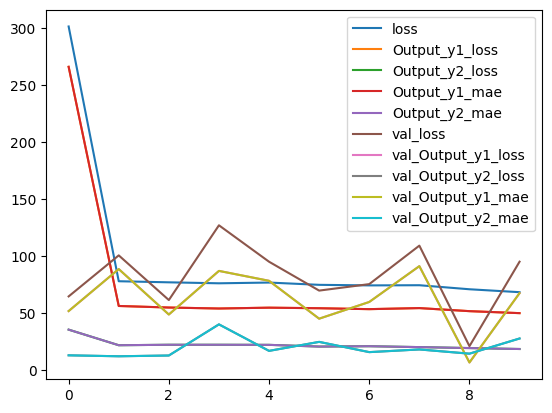

In [72]:
pd.DataFrame(functional_model_history_1.history).plot()

In [73]:
prdics = functional_model_1.predict(X_test)

60/60 [==============================] - 0s 1ms/step


In [77]:
prdics[0], prdics[1], X_test[0]

(array([[387.82895],
        [400.53525],
        [379.20468],
        ...,
        [405.37494],
        [364.4966 ],
        [392.99106]], dtype=float32),
 array([[26.712627],
        [27.378363],
        [26.27718 ],
        ...,
        [27.618908],
        [25.52534 ],
        [26.973858]], dtype=float32),
 array([0.45665722, 0.26354863, 0.82908847]))

In [76]:
y_test

(array([458.96, 463.29, 435.27, ..., 476.22, 440.29, 467.92]),
 array([44.63, 42.28, 70.32, ..., 38.38, 73.56, 44.58]))

In [81]:
len(prdics)

2

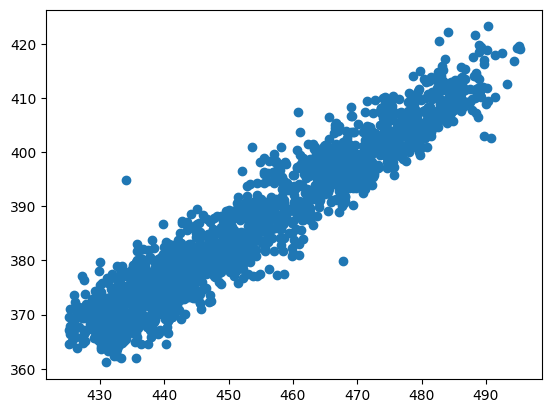

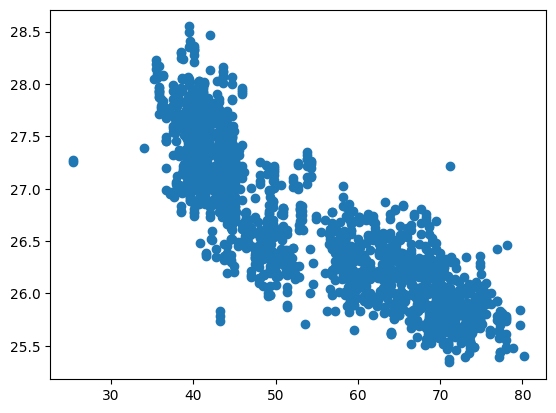

In [84]:
plt.scatter(y_test[0],prdics[0], label='Plotting actual vs predicted energy')
plt.figure()
plt.scatter(y_test[1],prdics[1], label='Plotting actual vs predicted vaccum')
plt.show()